In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Examining the Data

In [2]:
# Let's start with reading the data 

users_data = pd.read_pickle("../data/users_data_final.pkl")

In [3]:
# look at a preview of the data

users_data.head(n = 5)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [4]:
# look at the shape of the data (rows, columns)

users_data.shape

(45209, 19)

In [5]:
# How many users do we have in the dataframe?

len(np.unique(users_data.user_id))

# as expected, this is same as the number of rows in the data

45209

In [6]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

### Feature Selection: Drop the Date Joined Variable

In [7]:
# Did you come up with a way to engineer date joined variable?
# if not drop this variable

users_data.drop(['date_joined'], axis = 1, inplace = True)


### Feature Engineering: Numerical Data

In [8]:
# identify all the numerical features

numerical_columns = list(users_data.select_dtypes(['float64', 'int64', 'bool']).columns)
numerical_columns

['number_transactions',
 'total_amount_usd',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit']

In [9]:
# how many numerical features do we have

len(numerical_columns)

11

In [10]:
# replace missing numerical values with 0

users_data['number_transactions'].fillna(0, inplace = True)
users_data['total_amount_usd'].fillna(0, inplace = True)

In [11]:
# identify highly correlated variables
# look at the correlations, can you see any combinations with

users_data.corr()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.053000,-0.006587,0.106674,0.023340,0.058259,-0.013408,0.018530,-0.025933,-0.016458,-0.041566
total_amount_usd,-0.053000,1.000000,0.082964,-0.056963,-0.058107,-0.073512,0.019620,-0.015878,0.004753,0.016606,0.044277
age,-0.006587,0.082964,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.106674,-0.056963,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.023340,-0.058107,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.058259,-0.073512,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.013408,0.019620,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.018530,-0.015878,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.025933,0.004753,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.016458,0.016606,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


In [12]:
# we can use this code to identify highly correlated variables

threshold = 0.80 # define threshold

corr_matrix = users_data.corr().abs() # calculate the correlation matrix with 
high_corr_var = np.where(corr_matrix >= threshold) # identify variables that have correlations above defined threshold
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables


high_corr_var

[]

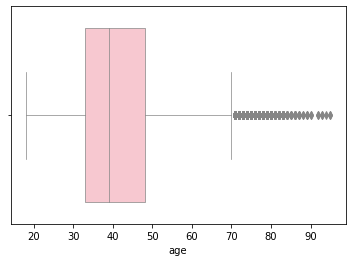

In [13]:
# identify outliers, lets start with age 
# draw a box plot for age

sns.boxplot(x = users_data['age'], color = 'pink', linewidth = 0.7);


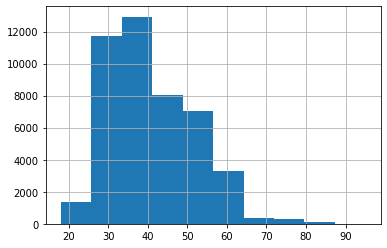

In [14]:
# draw a histogram for age

users_data.age.hist();

In [15]:
users_data.age.describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [16]:
# identifying outliers
# there is very minimal skew, let's assume that age is normally distributed and remove the outliers

age_mean = round(users_data.age.mean())
print("mean of age:", age_mean)

age_std = round(users_data.age.std())
print("standard deviation of age:", age_std)


mean of age: 41
standard deviation of age: 11


In [17]:
UB = age_mean + 3*age_std
LB = age_mean - 3*age_std

In [18]:
UB

74

In [19]:
LB

8

In [20]:
# subset the dataframe, so we only consider ages which are greater than LB and less than UB

users_data_cleaned = users_data[(users_data.age > LB) &
                                (users_data.age < UB)]
users_data_cleaned.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,0.0,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,0.0,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,mobile


In [21]:
users_data_cleaned.shape

(44872, 18)

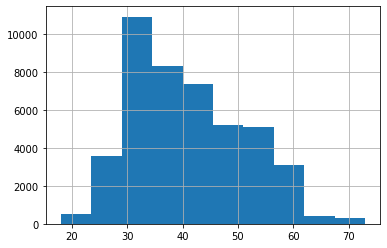

In [22]:
users_data_cleaned.age.hist();

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


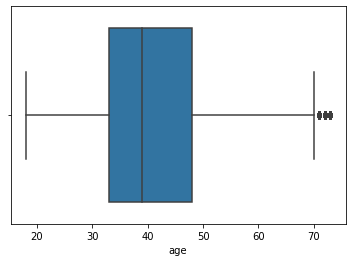

In [23]:
sns.boxplot(users_data_cleaned.age);

### Feature Engineering: Categorical Data

In [24]:
# identify all the categorical features

categorical_columns = list(users_data_cleaned.select_dtypes(
                        ['object']).columns)
print("# of categorical columns:", len(categorical_columns))


# of categorical columns: 7


In [25]:
categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [26]:
# We want to look at the distribution of e.g. jobs across all users
# We could use the value_counts function to get a count of unique values

users_data_cleaned.job.value_counts()

blue-collar      9729
management       9449
technician       7597
admin.           5170
services         4154
retired          1961
self-employed    1576
entrepreneur     1486
unemployed       1303
housemaid        1226
student           938
Name: job, dtype: int64

In [27]:
users_data_cleaned.job.value_counts(dropna = False)

blue-collar      9729
management       9449
technician       7597
admin.           5170
services         4154
retired          1961
self-employed    1576
entrepreneur     1486
unemployed       1303
housemaid        1226
student           938
NaN               283
Name: job, dtype: int64

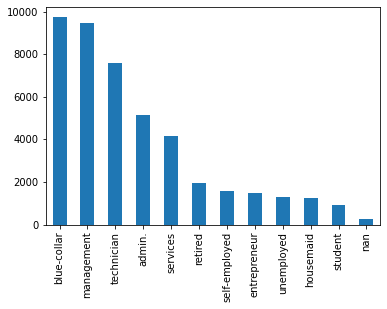

In [28]:
users_data_cleaned.job.value_counts(dropna = False).plot(kind = 'bar');

In [29]:
# identify and replace missing values

users_data_cleaned.isnull().sum()

# question: which feature has the most missing data?

user_id                    0
number_transactions        0
total_amount_usd           0
age                        0
job                      283
marital                    0
education               1818
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36746
term_deposit               0
device                    94
dtype: int64

In [30]:
percent_missing = users_data_cleaned.isnull().mean() 

percent_missing

user_id                0.000000
number_transactions    0.000000
total_amount_usd       0.000000
age                    0.000000
job                    0.006307
marital                0.000000
education              0.040515
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.290114
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.818907
term_deposit           0.000000
device                 0.002095
dtype: float64

In [31]:
def missing_dataframe(df):
    """
    @param df pandas DataFrame
    @return a DataFrame with the percentage of missing data for every feature
    """
    
    percent_missing = df.isnull().mean() 
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    return missing_value_df

In [32]:
missing_value_df = missing_dataframe(users_data_cleaned)
missing_value_df

,feature,percent_missing
15,poutcome,0.818907
10,contact,0.290114
6,education,0.040515
4,job,0.006307
17,device,0.002095
16,term_deposit,0.000000
14,previous,0.000000
13,pdays,0.000000
12,campaign,0.000000
11,duration,0.000000


In [33]:
# drop the feature that has a high percentage of missing data

users_data_cleaned.drop(['poutcome'], axis = 1, inplace = True)

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
# replace missing values with "Unknown"

users_data_cleaned['job'].fillna("Unknown", inplace = True)
users_data_cleaned['education'].fillna("Unknown", inplace = True)
users_data_cleaned['contact'].fillna("Unknown", inplace = True)
users_data_cleaned['device'].fillna("Unknown", inplace = True)


/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [35]:
# check do we have any missing data

missing_value_df = missing_dataframe(users_data_cleaned)
missing_value_df

,feature,percent_missing
0,user_id,0.0
9,loan,0.0
15,term_deposit,0.0
14,previous,0.0
13,pdays,0.0
12,campaign,0.0
11,duration,0.0
10,contact,0.0
8,housing,0.0
1,number_transactions,0.0


In [36]:
users_data_cleaned.info()

# question: what do we do next?
# answer: ENCODING.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44872 entries, 0 to 45215
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              44872 non-null  object 
 1   number_transactions  44872 non-null  float64
 2   total_amount_usd     44872 non-null  float64
 3   age                  44872 non-null  int64  
 4   job                  44872 non-null  object 
 5   marital              44872 non-null  object 
 6   education            44872 non-null  object 
 7   default              44872 non-null  bool   
 8   housing              44872 non-null  bool   
 9   loan                 44872 non-null  bool   
 10  contact              44872 non-null  object 
 11  duration             44872 non-null  int64  
 12  campaign             44872 non-null  int64  
 13  pdays                44872 non-null  int64  
 14  previous             44872 non-null  int64  
 15  term_deposit         44872 non-null 